In [37]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [18]:
def generate_random_normal_space(dim):
    # create n dimensional space by randomly generating n tuples of mean and std
    arr = np.empty((dim,), dtype=[('mean', '<f8'), ('std', '<f8')])
    arr['mean'] = np.random.uniform(0, 2, dim) - 1
    arr['std'] = np.random.uniform(0, 10, dim)
    return arr

In [29]:
def sample_normal_space(space_specs, n):
    # take n samples from a normal space defined by an array of mean and stds
    return np.vstack([np.random.normal(a['mean'], a['std'], n) for a in space_specs])

In [25]:
a = generate_random_normal_space(2)
a

array([(0.91603881, 4.445574  ), (0.22319046, 0.91224392)],
      dtype=[('mean', '<f8'), ('std', '<f8')])

In [30]:
b = sample_normal_space(a, 3000)
b.shape

(2, 3000)

In [31]:
kernel = stats.gaussian_kde(b)

In [35]:
xmin = b[0].min()
xmax = b[0].max()
ymin = b[1].min()
ymax = b[1].max()
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])

In [36]:
Z = np.reshape(kernel(positions).T, X.shape)

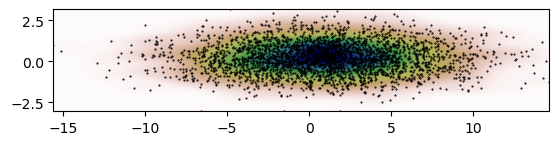

In [39]:
fig, ax = plt.subplots()
ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax])
ax.plot(b[0], b[1], 'k.', markersize=1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])
plt.show()

In [40]:
kernel.integrate_box([-10, -2.5], [10, 2.5])

0.9573082763835219

In [43]:
kernel.integrate_gaussian(a['mean'], np.diag(a['std']))

0.023555222644360108